In [1]:
import cv2
import numpy as np
import imageio
import os
import pandas as pd

In [ ]:
import cv2
import numpy as np
import imageio
import os
import pandas as pd

df_trial = pd.DataFrame(columns=['filename','coordinate', 'image_crop','caries'])
 
if __name__ == '__main__' :
 
    DEFAULT_HEIGHT = 400
    count=0
    i=0
   
    for file in os.listdir('no_cavity'):
        if file=='.DS_Store':
            continue
        count+=1
        print(str(count)+" "+file)
        #print(file)
        
    # Read image
        im1 = cv2.imread('no_cavity/%s'% file)
        height, width = im1.shape[:2]
        im=cv2.resize(im1,(int(DEFAULT_HEIGHT*width/height), DEFAULT_HEIGHT))
     
    # Select ROI
    
        loop_label = True
        while(loop_label):
            i+=1
            r = cv2.selectROI(im)
            print(r)
            
            
            # Crop image
            imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
            
    

            # Resized cropped image
            
            desired_size = 200
            old_size = imCrop.shape[:2] # old_size is in (height, width) format
            ratio = float(desired_size)/max(old_size)
            new_size = tuple([int(x*ratio) for x in old_size])
            
            imCrop_resize = cv2.resize(imCrop, (new_size[1], new_size[0]))

            delta_w = desired_size - new_size[1]
            delta_h = desired_size - new_size[0]
            top, bottom = delta_h//2, delta_h-(delta_h//2)
            left, right = delta_w//2, delta_w-(delta_w//2)

            color = [0, 0, 0]
            imCrop_square = cv2.copyMakeBorder(imCrop_resize, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

            #cv2.imshow("image", imCrop_square)
            
            # Convert color to greyscale
            imCrop_square_grey = cv2.cvtColor(imCrop_square, cv2.COLOR_BGR2GRAY)
            
            cv2.imshow("image", imCrop_square_grey)
            
            # save matrix and coordinates into a dictionary
           
            df_trial.loc[i, 'coordinate']=r
            df_trial.loc[i, 'filename']=file
            df_trial.loc[i, 'image_crop']=imCrop_square_grey
            df_trial.loc[i, 'caries']=1

            
            # select more areas (any key other than return key) or go on to the next image (return key)
            k = cv2.waitKey(0)
            # k =13 is return key, pressing return will switch to the next image. 
            # Pressing other keys will allow multiple selctions
            if k == 13:
                loop_label = False
                break
            else:
                continue
                
    cv2.destroyAllWindows()

1 https-::www.drlegacy.com:dental-technology.jpg


In [6]:
df_trial


NameError: name 'df_trial' is not defined

In [5]:
X_train_trial=df_trial['image_crop'].values
np.concatenate(X_train_trial) 
Y_train_trial=df_trial['caries'].values
Y_train_trial.shape

NameError: name 'df_trial' is not defined

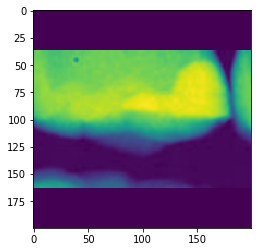

In [15]:
X_train.shape


from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [1]:
import cv2
import numpy as np
import imageio
import os
import pandas as pd

df_cavity = pd.DataFrame(columns=['filename','coordinate', 'image_crop','caries'])
 
if __name__ == '__main__' :
 
    DEFAULT_HEIGHT = 400
    count=0
    i=0
   
    for file in os.listdir('cavity'):
        if file=='.DS_Store':
            continue
        count+=1
        print(str(count)+" "+file)
        #print(file)
        
    # Read image
        im1 = cv2.imread('cavity/%s'% file)
        height, width = im1.shape[:2]
        im=cv2.resize(im1,(int(DEFAULT_HEIGHT*width/height), DEFAULT_HEIGHT))
     
    # Select ROI
    
        loop_label = True
        while(loop_label):
            i+=1
            r = cv2.selectROI(im)
            print(r)
            
            
            # Crop image
            imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
            
    

            # Resized cropped image
            
            desired_size = 200
            old_size = imCrop.shape[:2] # old_size is in (height, width) format
            ratio = float(desired_size)/max(old_size)
            new_size = tuple([int(x*ratio) for x in old_size])
            
            imCrop_resize = cv2.resize(imCrop, (new_size[1], new_size[0]))

            delta_w = desired_size - new_size[1]
            delta_h = desired_size - new_size[0]
            top, bottom = delta_h//2, delta_h-(delta_h//2)
            left, right = delta_w//2, delta_w-(delta_w//2)

            color = [0, 0, 0]
            imCrop_square = cv2.copyMakeBorder(imCrop_resize, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

            #cv2.imshow("image", imCrop_square)
            
            # Convert color to greyscale
            imCrop_square_grey = cv2.cvtColor(imCrop_square, cv2.COLOR_BGR2GRAY)
            
            cv2.imshow("image", imCrop_square_grey)
            
            # save matrix and coordinates into a dictionary
           
        
            df_cavity.loc[i, 'coordinate']=r
            df_cavity.loc[i, 'filename']=file
            df_cavity.loc[i, 'image_crop']=imCrop_square_grey
            df_cavity.loc[i, 'caries']=1

            
            # select more areas (any key other than return key) or go on to the next image (return key)
            k = cv2.waitKey(0)
            # k =13 is return key, pressing return will switch to the next image. 
            # Pressing other keys will allow multiple selctions
            if k == 13:
                loop_label = False
                break
            else:
                continue
                
    cv2.destroyAllWindows()

1 download.jpeg
(158, 164, 195, 160)
(318, 169, 219, 145)
(327, 7, 199, 138)
2 https-::www.ccdental.com.au:blog:why-dental-x-rays-play-a-crucial-part-in-your-dental-visit.jpeg
(16, 193, 123, 102)
(249, 62, 97, 102)
3 https-::beecherstreetdental.ie:why-take-radiographs:ci2:.jpg
(61, 58, 87, 108)
(140, 63, 108, 99)
(222, 66, 154, 114)
4 https-::buyxraysonline.com:wp-content:uploads:2017:12:BITEWING-XRAYS-4.jpg
(396, 69, 90, 111)
(398, 196, 103, 117)
5 http-::forum.dentalxp.com:case:details:can-we-trust-bitewing-radiographs-diagnose-ill-fitting-margins-crown-bridge:710.jpeg
(29, 200, 131, 126)
(283, 218, 120, 138)
6 buyxraysonline.jpg
(179, 69, 200, 156)
7 Dr-david-kaplan.jpg
(93, 90, 97, 82)
(3, 161, 49, 83)
8 https-::buyxraysonline.com:wp-content:uploads:2017:12:BITEWING-XRAYS-7.jpg
(219, 60, 87, 111)
(294, 54, 110, 118)
(2, 199, 119, 146)
(112, 204, 157, 130)
9 http-::smilesonbristoldentistry.com:wp-content:uploads:2016:03:Xray-blog7.jpg
(216, 118, 78, 84)
10 images.jpeg
(286, 39, 166,

In [ ]:
df_cavity.head()
export_csv = df_cavity.to_csv (r'cropped_cavity.csv', index = None,header=True) #Don't forget to add '.csv' at the end of the path
df_cavity.to_pickle("./cropped_cavity.pkl")

In [2]:
unpickled_df = pd.read_pickle("./cropped_cavity.pkl")
#print(unpickled_df)
print(unpickled_df.shape)
X_train_cavity_pickle=unpickled_df['image_crop'].values
Y_train_cavity_pickle=unpickled_df['caries'].values
print(X_train_cavity_pickle[1].shape)

(129, 4)
(200, 200)


In [22]:
X_train_cavity=df_cavity['image_crop'].values

Y_train_cavity=df_cavity['caries'].values

In [25]:
X_train_cavity[1].shape
np.concatenate(X_train_cavity)
X_train_cavity[1].shape

(200, 200)

In [35]:
df=pd.read_csv('cropped_cavity.csv')
print(df.head)

<bound method NDFrame.head of                                               filename            coordinate  \
0                                        download.jpeg  (158, 164, 195, 160)   
1                                        download.jpeg  (318, 169, 219, 145)   
2                                        download.jpeg    (327, 7, 199, 138)   
3    https-::www.ccdental.com.au:blog:why-dental-x-...   (16, 193, 123, 102)   
4    https-::www.ccdental.com.au:blog:why-dental-x-...    (249, 62, 97, 102)   
5    https-::beecherstreetdental.ie:why-take-radiog...     (61, 58, 87, 108)   
6    https-::beecherstreetdental.ie:why-take-radiog...    (140, 63, 108, 99)   
7    https-::beecherstreetdental.ie:why-take-radiog...   (222, 66, 154, 114)   
8    https-::buyxraysonline.com:wp-content:uploads:...    (396, 69, 90, 111)   
9    https-::buyxraysonline.com:wp-content:uploads:...  (398, 196, 103, 117)   
10   http-::forum.dentalxp.com:case:details:can-we-...   (29, 200, 131, 126)   
11   http-

In [36]:
X_train_cavity=df['image_crop'].values

print(X_train_cavity)

['[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]'
 '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 .

In [1]:
import cv2
import numpy as np
import imageio
import os
import pandas as pd

df_no_cavity = pd.DataFrame(columns=['filename','coordinate', 'image_crop','caries'])
 
if __name__ == '__main__' :
 
    DEFAULT_HEIGHT = 400
    count=0
    i=0
   
    for file in os.listdir('train_cv'):
        if file=='.DS_Store':
            continue
        count+=1
        print(str(count)+" "+file)
        #print(file)
        
    # Read image
        im1 = cv2.imread('train_cv/%s'% file)
        height, width = im1.shape[:2]
        im=cv2.resize(im1,(int(DEFAULT_HEIGHT*width/height), DEFAULT_HEIGHT))
     
    # Select ROI
    
        loop_label = True
        while(loop_label):
            i+=1
            r = cv2.selectROI(im)
            print(r)
            
            
            # Crop image
            imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
            
    

            # Resized cropped image
            
            desired_size = 200
            old_size = imCrop.shape[:2] # old_size is in (height, width) format
            ratio = float(desired_size)/max(old_size)
            new_size = tuple([int(x*ratio) for x in old_size])
            
            imCrop_resize = cv2.resize(imCrop, (new_size[1], new_size[0]))

            delta_w = desired_size - new_size[1]
            delta_h = desired_size - new_size[0]
            top, bottom = delta_h//2, delta_h-(delta_h//2)
            left, right = delta_w//2, delta_w-(delta_w//2)

            color = [0, 0, 0]
            imCrop_square = cv2.copyMakeBorder(imCrop_resize, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

            #cv2.imshow("image", imCrop_square)
            
            # Convert color to greyscale
            imCrop_square_grey = cv2.cvtColor(imCrop_square, cv2.COLOR_BGR2GRAY)
            
            cv2.imshow("image", imCrop_square_grey)
            
            # save matrix and coordinates into a dictionary
           
            df_no_cavity.loc[i, 'coordinate']=r
            df_no_cavity.loc[i, 'filename']=file
            df_no_cavity.loc[i, 'image_crop']=imCrop_square_grey
            df_no_cavity.loc[i, 'caries']=0

            
            # select more areas (any key other than return key) or go on to the next image (return key)
            k = cv2.waitKey(0)
            # k =13 is return key, pressing return will switch to the next image. 
            # Pressing other keys will allow multiple selctions
            if k == 13:
                loop_label = False
                break
            else:
                continue
                
    cv2.destroyAllWindows()


1 https-::www.drlegacy.com:dental-technology.jpg
(41, 93, 149, 132)
(349, 124, 107, 118)
(62, 214, 161, 146)
(221, 247, 158, 120)
(380, 255, 102, 104)
2 download.jpeg
(551, 153, 115, 154)
3 https-::www.ccdental.com.au:blog:why-dental-x-rays-play-a-crucial-part-in-your-dental-visit.jpeg
(36, 84, 145, 103)
(176, 70, 89, 88)
4 https-::beecherstreetdental.ie:why-take-radiographs:ci2:.jpg
(49, 68, 77, 88)
(325, 195, 158, 97)
(371, 68, 135, 95)
5 https-::buyxraysonline.com:wp-content:uploads:2017:12:BITEWING-XRAYS-4.jpg
(105, 65, 139, 120)
(96, 185, 154, 145)
(234, 89, 162, 99)
(93, 195, 158, 128)
6 http-::forum.dentalxp.com:case:details:can-we-trust-bitewing-radiographs-diagnose-ill-fitting-margins-crown-bridge:710.jpeg
(359, 97, 96, 109)
7 buyxraysonline.jpg
(387, 69, 142, 142)
(56, 217, 221, 173)
8 Dr-david-kaplan.jpg
(33, 88, 63, 86)
(47, 173, 114, 105)
(158, 170, 121, 102)
9 https-::buyxraysonline.com:wp-content:uploads:2017:12:BITEWING-XRAYS-7.jpg
(22, 44, 175, 157)
(188, 62, 103, 125)

AttributeError: 'NoneType' object has no attribute 'shape'

In [3]:
df_no_cavity.head()
df_no_cavity.to_csv (r'cropped_no_cavity.csv', index = None,header=True) #Don't forget to add '.csv' at the end of the path
df_no_cavity.to_pickle("./cropped_no_cavity.pkl")

In [2]:
df_no_cavity.head()

,filename,coordinate,image_crop,caries
1,https-::www.drlegacy.com:dental-technology.jpg,"(41, 93, 149, 132)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,https-::www.drlegacy.com:dental-technology.jpg,"(349, 124, 107, 118)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 57, 57, 56, 56, 5...",0
3,https-::www.drlegacy.com:dental-technology.jpg,"(62, 214, 161, 146)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,https-::www.drlegacy.com:dental-technology.jpg,"(221, 247, 158, 120)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
5,https-::www.drlegacy.com:dental-technology.jpg,"(380, 255, 102, 104)","[[0, 0, 17, 18, 21, 21, 21, 21, 21, 20, 18, 18...",0


In [3]:
unpickled_nc_df = pd.read_pickle("./cropped_no_cavity.pkl")
#print(unpickled_df)
print(unpickled_nc_df.shape)
X_train_no_cavity_pickle=unpickled_nc_df['image_crop'].values
Y_train_no_cavity_pickle=unpickled_nc_df['caries'].values
print(X_train_no_cavity_pickle[1].shape)

(100, 4)
(200, 200)


In [4]:
X_train=np.concatenate((X_train_cavity_pickle,X_train_no_cavity_pickle))
Y_train=np.concatenate((Y_train_cavity_pickle,Y_train_no_cavity_pickle))
print(X_train[1].shape)
print(Y_train.shape)

(200, 200)
(229,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], 1, 200, 200)


ValueError: cannot reshape array of size 229 into shape (229,1,200,200)

In [9]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, 2)
print(Y_train[1])

[[[[1. 0.]
   [0. 1.]]

  [[0. 1.]
   [1. 0.]]]


 [[[0. 1.]
   [1. 0.]]

  [[1. 0.]
   [0. 1.]]]]


In [5]:
from keras.models import Sequential


Using Theano backend.
